In [105]:
import os
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from keras import Sequential,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks  import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras import layers, models


from tensorflow.keras.preprocessing.image import load_img

### Data Reading / Data Understanding

In [107]:
# Defining the path for both train and test images from dataset.
train_images_path = '../Org Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
test_images_path = '../Org Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

In [108]:
# Getting count of Images 
train_images = pathlib.Path(train_images_path)
image_count_train = len(list(train_images.glob('*/*.jpg')))
print(image_count_train)

2239


In [110]:
# Getting count of Images 
test_images = pathlib.Path(test_images_path)
image_count_test = len(list(test_images.glob('*/*.jpg')))
print(image_count_test)

118


### Dataset Creation

In [111]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [112]:
# Loading the train data
# Creating train dataset from the train directory with a batch size of 32 .
# Resized images to 180*180.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                               batch_size=BATCH_SIZE, 
                                                               label_mode='categorical',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [113]:
## Storing Class Names in a variable for further reference 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [114]:
# Loading the validation data
# Creating validation dataset from the train directory with a batch size of 32 .
# Resized images to 180*180.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                             batch_size=BATCH_SIZE, 
                                                             label_mode='categorical',
                                                             subset='validation')
 

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


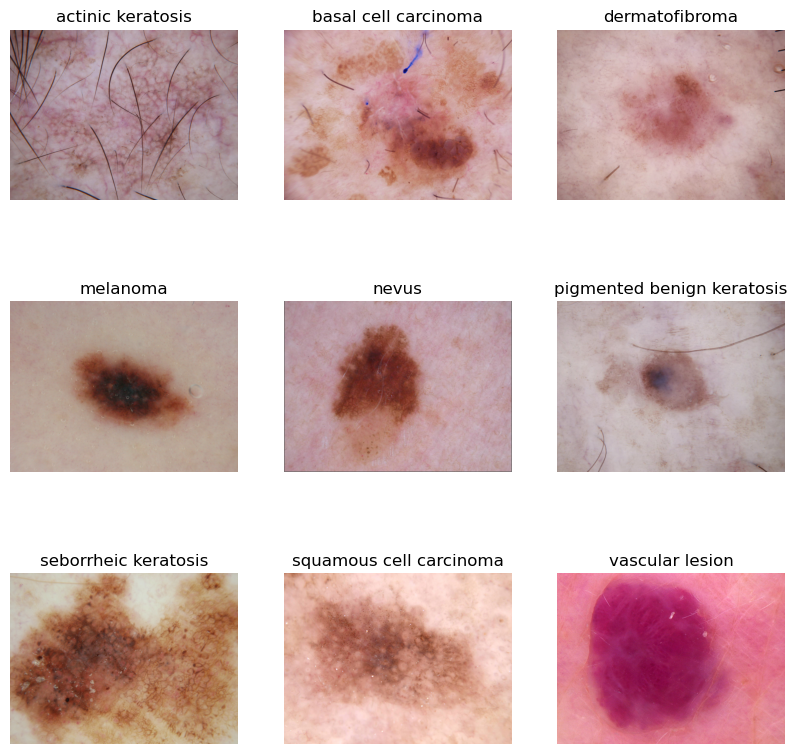

In [115]:
## Visualizing one instance of all the nine classes present in the dataset 

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imread(
      str(list(train_images.glob(f'{class_names[i]}/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')

On looking the sample for each of the class , there are some classes that are visually matching a lot and it seems to be a challenging to differentiate between few of the classes for example melanoma and pigmented bening keratosis , same goes for melanoma and nevus also 

### Model Building & training  - 1 

In [116]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [117]:
# 1. Building the CNN Model
model = models.Sequential([
    
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

In [118]:
# Defining  optimiser and loss function
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


In [119]:
# View the summary of all layers
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 41, 41, 128)     

In [120]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/20
56/56 [==============================] - 22s 337ms/step - loss: 2.0077 - accuracy: 0.2411 - val_loss: 1.9441 - val_accuracy: 0.2528
Epoch 2/20
56/56 [==============================] - 19s 340ms/step - loss: 1.6820 - accuracy: 0.3945 - val_loss: 1.5009 - val_accuracy: 0.4922
Epoch 3/20
56/56 [==============================] - 18s 330ms/step - loss: 1.5521 - accuracy: 0.4559 - val_loss: 1.4665 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 21s 367ms/step - loss: 1.3960 - accuracy: 0.5089 - val_loss: 1.4706 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 22s 392ms/step - loss: 1.3445 - accuracy: 0.5379 - val_loss: 1.4451 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 22s 396ms/step - loss: 1.2476 - accuracy: 0.5502 - val_loss: 1.3908 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 22s 394ms/step - loss: 1.1692 - accuracy: 0.5982 - val_loss: 1.3996 - val_accuracy: 0.4966

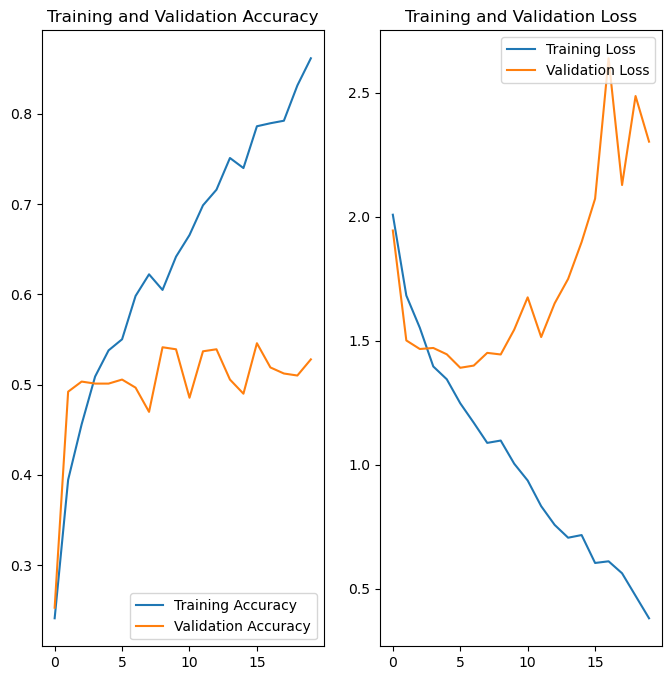

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations 

 - The model is overfitting as the training accuracy is significantly higher than the validation accuracy.
 - the model is learning, but there is room for improvement in terms of overfitting and validation performance.

### Model Building & training - 2

In [ ]:
# Due to limited training data , the above model we created seems to overfit , lets create a new model with a layer for data 
# augmentation so that model can have training on more images that would be generated based on below augmentation attributes

In [123]:
# Adding data augmentation as a layer helps the model to avoid overfitting by
# artificially increasing the diversity of the training dataset
# Defining  data augmentation strategy to resolve underfitting/overfitting 
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

In [124]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [125]:
# 1. Building the CNN Model
model = models.Sequential([
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), 
    data_augmentation, 
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

In [126]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 sequential_13 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                               

In [128]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/20
56/56 [==============================] - 22s 373ms/step - loss: 2.0003 - accuracy: 0.2494 - val_loss: 1.7968 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 22s 402ms/step - loss: 1.7477 - accuracy: 0.3594 - val_loss: 1.5539 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 26s 462ms/step - loss: 1.5072 - accuracy: 0.4816 - val_loss: 1.5004 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 26s 459ms/step - loss: 1.5671 - accuracy: 0.4492 - val_loss: 1.4507 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 25s 452ms/step - loss: 1.4344 - accuracy: 0.4989 - val_loss: 1.4515 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 25s 448ms/step - loss: 1.4113 - accuracy: 0.5017 - val_loss: 1.4045 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 25s 448ms/step - loss: 1.3431 - accuracy: 0.5257 - val_loss: 1.3834 - val_accuracy: 0.4989

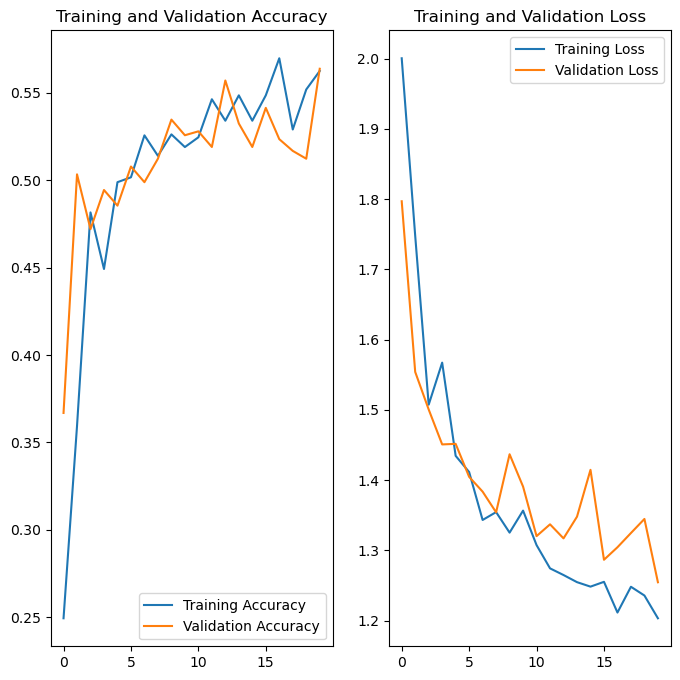

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations 

 - With the data augmentation strategy applied , the overfitting problem seems to be fixed as now there is not much gap between training and validation dataset 
 - But the accuracy levels have not reached the expectation. It could be there an class imbalance as well as low data count of Images , a reason of this. 

## Class Imbalance 

In [131]:
##Find the distribution of classes in the training dataset
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(train_images_path)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


### Class Distribution QA 
Which class has the least number of samples? <br/>
seborrheic keratosis (77)

Which classes dominate the data in terms of the proportionate number of samples? <br/>
pigmented benign keratosis  (462)

In [132]:
train_images_path

'../Org Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

In [137]:
train_images_path = '../Augmented Skin cancer ISIC The International Skin Imaging Collaboration/Train/' 

In [138]:
train_images = pathlib.Path(train_images_path)
test_images = pathlib.Path(test_images_path)

### Rectify class imbalances present in the training dataset with Augmentor library.

In [140]:
!pip install Augmentor

In [141]:
import Augmentor
# max_images = max([len(os.listdir(train_images / i)) for i in class_names])
# max_images = round(max_images / 100) * 100 
addCount = 500
for i in class_names:
    train_images_sub = train_images /  i
    classes_image_count_train = len(list(train_images_sub.glob('*.jpg')))
    p = Augmentor.Pipeline(train_images_sub)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(addCount)

# On a side note , would like to add here that I initially thought to get the maximum number of images for a
# class which was coming around 463 , so Ideally to remove the class imbalance , we can take a round of max to its nearest 
# 100 which was coming 500. But having this set of images was failing to achieve the accuracy , my accuracy at that point
# was coming around 50 to 60 % only , so I added 500 more images to each of the class and the model performance got increase
# which means that apart of taking care of class imbalance , we should also take care of having a good count 
# of images so that model can learn better 

Initialised with 114 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E1F73A8B0>: 100%|██████████| 500/500 [00:01<00:00, 412.36 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E205B5340>: 100%|██████████| 500/500 [00:01<00:00, 399.04 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20E1FACAA60>: 100%|██████████| 500/500 [00:01<00:00, 390.01 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x20E20B39970>: 100%|██████████| 500/500 [00:06<00:00, 78.85 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x20E1F473F70>: 100%|██████████| 500/500 [00:05<00:00, 85.47 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E1FACA880>: 100%|██████████| 500/500 [00:01<00:00, 381.83 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20E20973040>: 100%|██████████| 500/500 [00:02<00:00, 175.00 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E1F687C40>: 100%|██████████| 500/500 [00:01<00:00, 353.08 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ..\Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E1FAC51F0>: 100%|██████████| 500/500 [00:01<00:00, 353.21 Samples/s]                  


### Model Building & training - 3

In [142]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                               batch_size=BATCH_SIZE, 
                                                               label_mode='categorical',
                                                               subset='training')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [143]:
# Loading the validation data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                             batch_size=BATCH_SIZE, 
                                                             label_mode='categorical',
                                                             subset='validation')
 

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [144]:
class_names = train_ds.class_names

In [145]:
model = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(IMG_HEIGHT,IMG_WIDTH,3)), 
    
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),   
    
    layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),  
    
    layers.Dropout(0.5),
    
    #Flatten Layer
    layers.Flatten(),

    #Dense Layer
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(len(class_names),activation='softmax')

])


In [146]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [148]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 41, 41, 128)     

In [149]:
epochs = 30

In [150]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[reduce_lr])

Epoch 1/30
169/169 [==============================] - 70s 407ms/step - loss: 2.1332 - accuracy: 0.1714 - val_loss: 1.8900 - val_accuracy: 0.2368 - lr: 0.0010
Epoch 2/30
169/169 [==============================] - 77s 457ms/step - loss: 1.8336 - accuracy: 0.2830 - val_loss: 1.5611 - val_accuracy: 0.4246 - lr: 0.0010
Epoch 3/30
169/169 [==============================] - 82s 483ms/step - loss: 1.6876 - accuracy: 0.3576 - val_loss: 1.6755 - val_accuracy: 0.3526 - lr: 0.0010
Epoch 4/30
169/169 [==============================] - 81s 479ms/step - loss: 1.5706 - accuracy: 0.3898 - val_loss: 1.5444 - val_accuracy: 0.4246 - lr: 0.0010
Epoch 5/30
169/169 [==============================] - 79s 464ms/step - loss: 1.5195 - accuracy: 0.4119 - val_loss: 1.4098 - val_accuracy: 0.4447 - lr: 0.0010
Epoch 6/30
169/169 [==============================] - 79s 465ms/step - loss: 1.4656 - accuracy: 0.4245 - val_loss: 1.3997 - val_accuracy: 0.4543 - lr: 0.0010
Epoch 7/30
169/169 [==============================] 

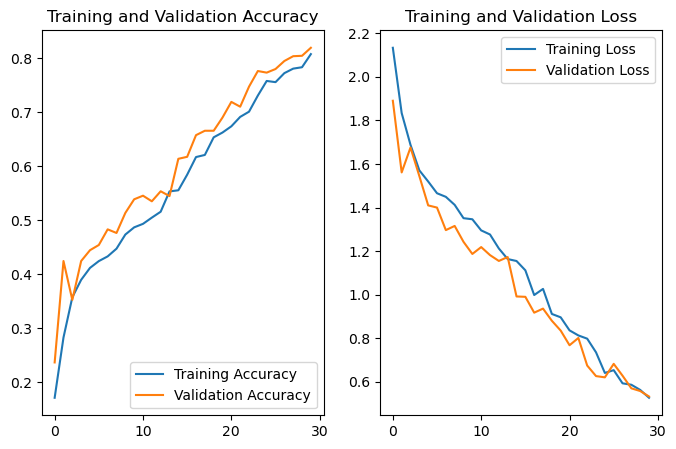

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
Above charts clearly denotes that model has been able to achieve a good performance on adding augmentation techniques to the 
existing set of images. However, the model seems to perform well around 20 epoch and post that point , validation accuracy 
has stopped improving and also the difference between training and validation accuracy is also getting increased after 20 epochs

In [ ]:
!pip install tabulate

In [152]:
from tabulate import tabulate
data = []
for epoch, train_acc, val_acc, train_loss, val_loss in zip(epochs_range, acc, val_acc, loss, val_loss):
    data.append([epoch, train_acc, val_acc, train_loss, val_loss])

headers = ["Epochs", "Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

|   Epochs |   Training Accuracy |   Validation Accuracy |   Training Loss |   Validation Loss |
|---------:|--------------------:|----------------------:|----------------:|------------------:|
|        0 |            0.171365 |              0.236823 |        2.13325  |          1.89003  |
|        1 |            0.283012 |              0.424647 |        1.83361  |          1.56115  |
|        2 |            0.357567 |              0.352635 |        1.68762  |          1.67549  |
|        3 |            0.389837 |              0.424647 |        1.57061  |          1.54443  |
|        4 |            0.411907 |              0.444692 |        1.51949  |          1.40984  |
|        5 |            0.424518 |              0.454343 |        1.46558  |          1.39974  |
|        6 |            0.433234 |              0.483296 |        1.44905  |          1.29637  |
|        7 |            0.447515 |              0.476615 |        1.41215  |          1.31551  |
|        8 |            0.4736

In [153]:
def getMaxRecordForParameters(colIndex, tag):
    # Find the maximum value based on colIndex
    max_data = max(data, key=lambda x: x[colIndex])
    max_value = max_data[colIndex]
    epoch_with_max_value = max_data[0]
    print(f"{tag}: {max_value} (Epoch {epoch_with_max_value})")

In [154]:
# Find the maximum training accuracy and corresponding epoch number
getMaxRecordForParameters(1,"Training Accuracy")
getMaxRecordForParameters(2,"Validation Accuracy") 

Training Accuracy: 0.8078634738922119 (Epoch 29)
Validation Accuracy: 0.8195990920066833 (Epoch 29)


Training Accuracy: It reaches a  value of approximately 81% after 29 epochs. 

Validation Accuracy:  the validation accuracy, which is a measure of the model's performance on unseen data, reaches around 82%  after epoch 29. 

We have a got a very decent model after adding images through augmentation library. 


## Testing the Model

1/1 [==============================] - 0s 31ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


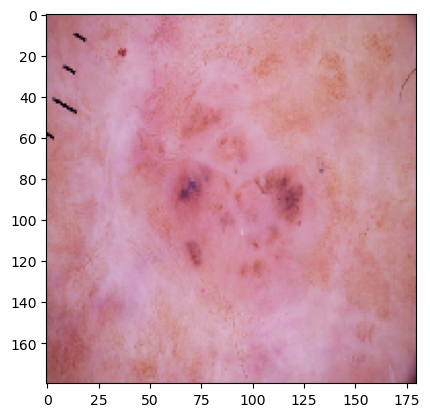

In [157]:
## Though this was not part of the assignment 

from glob import glob
Test_image_path = os.path.join(test_images, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

### Conclusion

Here is the concluded summary for all the 3 models : 


Model 1: Without data augmentation, the model struggled to generalize and had a significant gap between training and validation accuracy.It achieved a training accuracy of 86% but only a validation accuracy of 53%, indicating overfitting.

Model 2:The addition of data augmentation helped reduce overfitting, as seen by the smaller gap between training and validation accuracy.Training accuracy improved to 56%, but overall accuracy only increased marginally.

Model 3:Addressing class imbalance by generating additional data for sparse classes significantly improved both training and validation accuracy.Achieved a training accuracy of 80% and a validation accuracy of 81%, indicating a more balanced and effective model.